In [92]:
from skimage import io
import numpy as np

In [93]:
def create_bayer_matrix(n):
    x = np.array([[0]])
    i = 0
    while n!=1:
        if i%2 == 1 or i == 0:
            consts = np.array([0,2,3,1])
            a,b,c,d = (x*4 + const for const in consts)
        else:
            # transpose matrix
            consts = np.array([0,3,2,1])
            a,b,c,d = (x*4 + const for const in consts.T)
            a,b,c,d = a.T, b.T ,c.T ,d.T

        up = np.concatenate((a,b),axis=1)
        dn = np.concatenate((c,d),axis=1)
        y = np.concatenate((up,dn),axis=0)
        x = y

        n=int(n/2)
        i+=1
        
    return x

In [94]:
m2 = create_bayer_matrix(2)
print('2x2 bayer_matrix:\n',m2)

m4 = create_bayer_matrix(4)
print('\n4x4 bayer_matrix:\n',m4)

m8 = create_bayer_matrix(8)
print('\n8x8 bayer_matrix:\n',m8)

# m16 = create_bayer_matrix(16)
# print('\n16x16 bayer_matrix:\n',m16)

2x2 bayer_matrix:
 [[0 2]
 [3 1]]

4x4 bayer_matrix:
 [[ 0  8  2 10]
 [12  4 14  6]
 [ 3 11  1  9]
 [15  7 13  5]]

8x8 bayer_matrix:
 [[ 0 48 12 60  3 51 15 63]
 [32 16 44 28 35 19 47 31]
 [ 8 56  4 52 11 59  7 55]
 [40 24 36 20 43 27 39 23]
 [ 2 50 14 62  1 49 13 61]
 [34 18 46 30 33 17 45 29]
 [10 58  6 54  9 57  5 53]
 [42 26 38 22 41 25 37 21]]


256
226


c:\users\root\pycharmprojects\test\venv\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


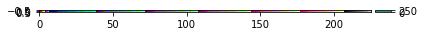

In [95]:
# build 256 colors palette
with open('256_color.json' ,'r') as reader:
    jf = json.loads(reader.read())

color = [[c for c in line['rgb'].values()] for line in jf]
        
print(len(color))

# build img pattle
im = Image.open('dog1.jpg')
im2 = im.convert("P", palette=Image.ADAPTIVE, colors=256)

color_pattle = [color[idx] for idx in set(im2.getpalette())]

print(len(color_pattle))

color_palette_map = np.array(color_pattle)
io.imshow(np.array([color_palette_map]))
norm_color_palette_map = color_palette_map/256

In [96]:
def find_closest_palette_color(px,norm_color_palette_map):
    norm_px = px / 256
    min_dst = 3
    closest_palette_norm_color = None
    
    for norm_color in norm_color_palette_map:
        dst = np.linalg.norm(norm_px - norm_color) # euclidean distance is l2 norm
        if dst < min_dst:
            min_dst = dst
            closest_palette_norm_color = norm_color
    
    closest_palette_color = closest_palette_norm_color * 256
    return closest_palette_color

(342, 512, 3)


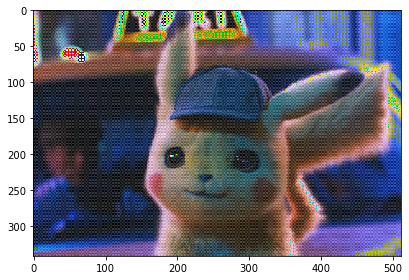

In [97]:
img = io.imread('pikachu.jpg')
ditherMatrixSize = 2

offset = (ditherMatrixSize * (ditherMatrixSize / 2) - 0.5)
r = 256  / (ditherMatrixSize * ditherMatrixSize)

bayer_matrix = create_bayer_matrix(ditherMatrixSize)
ditherMatrix = ((bayer_matrix) / (ditherMatrixSize*ditherMatrixSize))

(w,h,c) = img.shape
print(img.shape)

for x in range(w):
    for y in range(h):
        for z in range(c):
            img[x][y][z] = img[x][y][z] + \
            (r *  ditherMatrix[x%ditherMatrixSize][y%ditherMatrixSize])
        
io.imshow(img)